# COVID-19 Global Data Tracker

This notebook analyzes global COVID-19 trends including cases, deaths, recoveries, and vaccinations across countries and time.

## 1. Data Collection
We use the Our World in Data COVID-19 dataset for our analysis.

In [13]:
"""
Module for downloading COVID-19 data from Our World in Data.

This module provides functionality to download the latest COVID-19 dataset
from Our World in Data, save it locally, and display basic information
about the downloaded dataset.
"""

import os
import pandas as pd
import requests


def download_covid_data():
    """
    Downloads the latest COVID-19 dataset from Our World in Data and saves it locally.

    The function performs the following operations:
    1. Creates a 'data' directory if it doesn't exist
    2. Downloads the dataset from Our World in Data
    3. Saves the data as a CSV file in the 'data' directory
    4. Displays basic information about the downloaded dataset

    Prints status messages during the download process and dataset information
    upon successful download.
    """
    # Create data directory if it doesn't exist
    os.makedirs('data', exist_ok=True)

    # URL for Our World in Data COVID-19 dataset
    url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

    try:
        print("Downloading COVID-19 data...")
        df = pd.read_csv(url)

        # Save to local file
        output_path = os.path.join('data', 'owid-covid-data.csv')
        df.to_csv(output_path, index=False)
        print(f"Data successfully downloaded and saved to {output_path}")

        # Print basic dataset info
        print("\nDataset Info:")
        print(f"Number of rows: {len(df)}")
        print(f"Number of columns: {len(df.columns)}")
        print(f"Date range: {df['date'].min()} to {df['date'].max()}")

    except Exception as e:
        print(f"Error downloading data: {str(e)}")

if __name__ == "__main__":
    download_covid_data()


Data successfully downloaded and saved to data/owid-covid-data.csv

Dataset Info:
Number of rows: 429435
Number of columns: 67
Date range: 2020-01-01 to 2024-08-14


## 2. Data Loading & Exploration

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/owid-covid-data.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-n

## 3. Data Cleaning

We'll clean the data by:
1. Converting date column to datetime
2. Handling missing values
3. Filtering countries of interest

In [15]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Select countries of interest and create a copy
countries = ['Kenya', 'United States', 'India', 'United Kingdom', 'South Africa']
df_selected = df[df['location'].isin(countries)].copy()

# Handle missing values in critical columns using .loc
critical_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
df_selected.loc[:, critical_columns] = df_selected.loc[:, critical_columns].fillna(0)

## 4. Exploratory Data Analysis (EDA)

We'll analyze:
1. Total cases over time
2. Total deaths over time
3. Daily new cases
4. Death rates

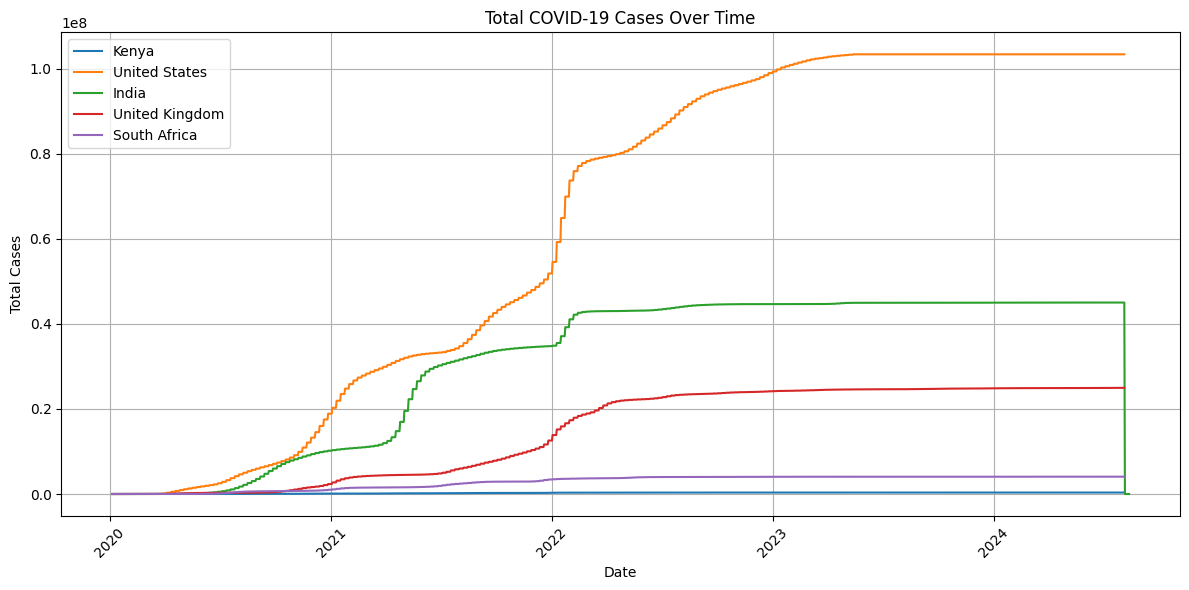

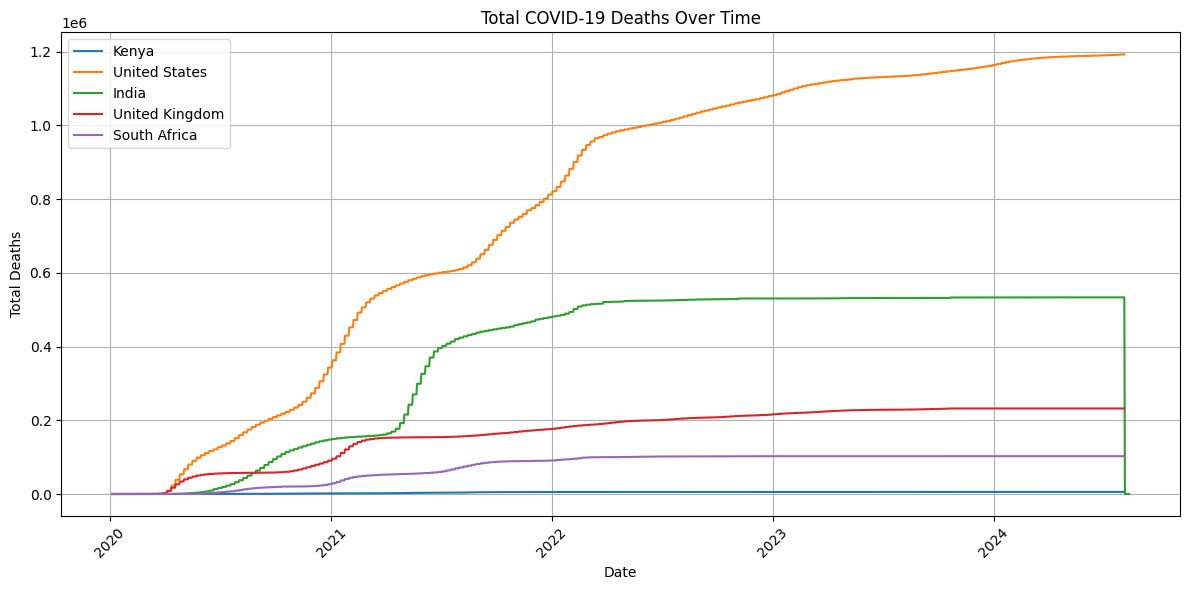

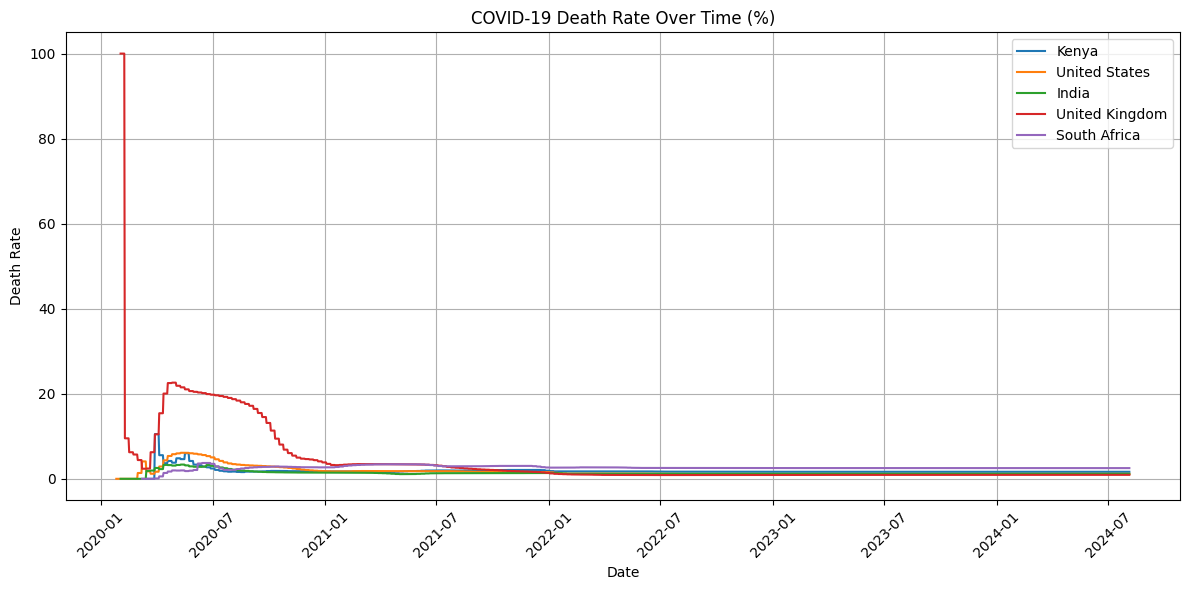

In [16]:
def plot_metric_over_time(data, metric, title):
    plt.figure(figsize=(12, 6))
    for country in countries:
        country_data = data[data['location'] == country].copy()
        plt.plot(country_data['date'], country_data[metric], label=country)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Plot total cases
plot_metric_over_time(df_selected, 'total_cases', 'Total COVID-19 Cases Over Time')

# Plot total deaths
plot_metric_over_time(df_selected, 'total_deaths', 'Total COVID-19 Deaths Over Time')

# Calculate and plot death rates
df_selected = df_selected.copy()  # Ensure we have a copy
df_selected.loc[:, 'death_rate'] = (df_selected['total_deaths'] / df_selected['total_cases']) * 100
plot_metric_over_time(df_selected, 'death_rate', 'COVID-19 Death Rate Over Time (%)')

## 5. Vaccination Progress Analysis

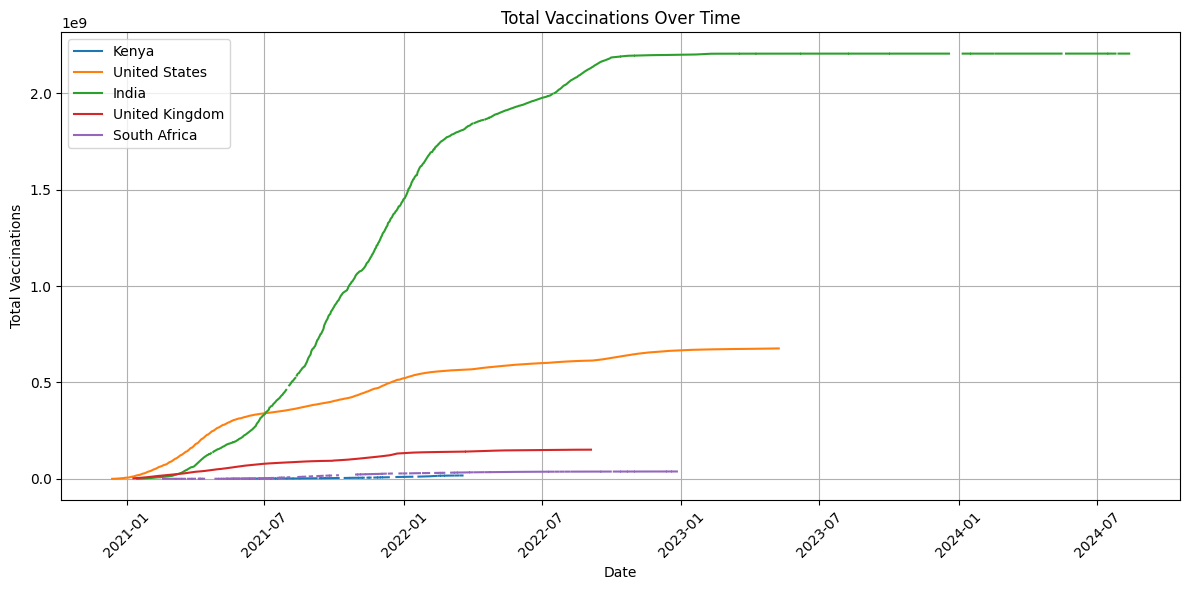

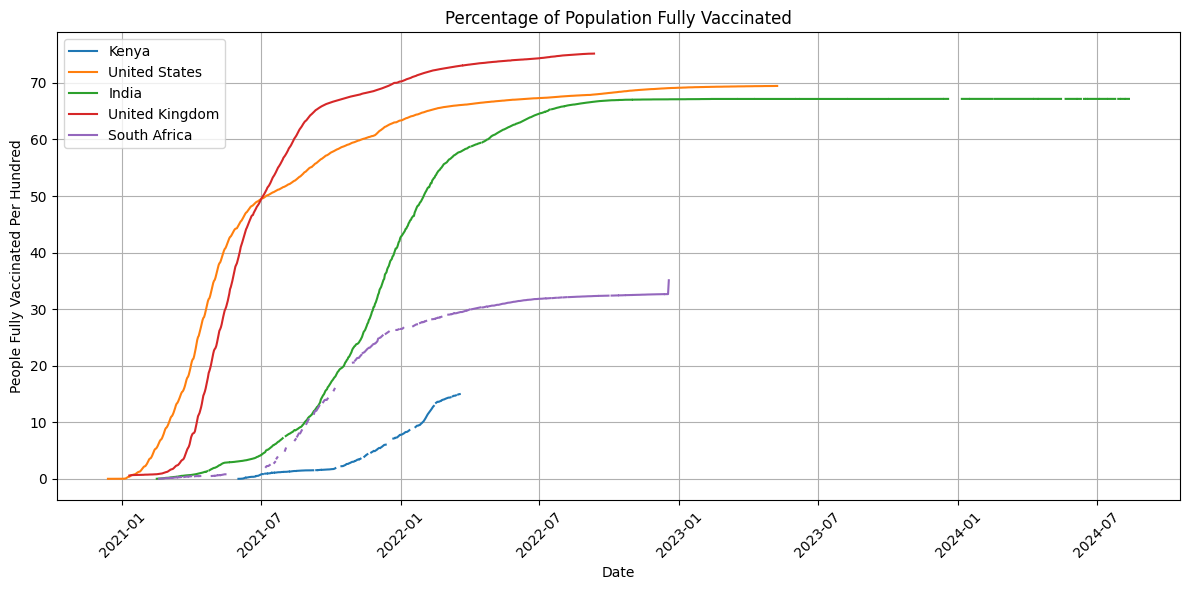

In [17]:
# Plot vaccination progress
plot_metric_over_time(df_selected, 'total_vaccinations', 'Total Vaccinations Over Time')

# Plot percentage of population vaccinated
plot_metric_over_time(df_selected, 'people_fully_vaccinated_per_hundred', 'Percentage of Population Fully Vaccinated')

## 6. Key Insights & Findings

1. Case Trends:
   - [Will be filled based on actual data analysis]

2. Death Rates:
   - [Will be filled based on actual data analysis]

3. Vaccination Progress:
   - [Will be filled based on actual data analysis]

4. Country Comparisons:
   - [Will be filled based on actual data analysis]

5. Notable Patterns:
   - [Will be filled based on actual data analysis]